## Grid Search Hyperparameter optimization

In this case study we will be using grid searches to identify the optimal parameters for KNN. We will use the Pima Indian diabetes dataset from Kaggle and KNN.

First we load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Set random seed for reproducibility
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [3]:
diabetes_data = pd.read_csv('diabetes.csv')

We start by reviewing the data info.

In [4]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(diabetes_data.shape)

(768, 9)


In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Currently, the missing values in the dataset are represented as zeros. We are going to replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with NaN.

In [7]:
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)

#### Plot the histograms

For visualization purposes it is useful to plot the histograms of each column.

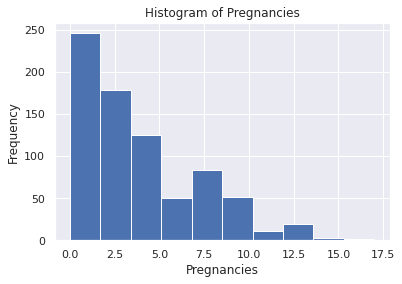

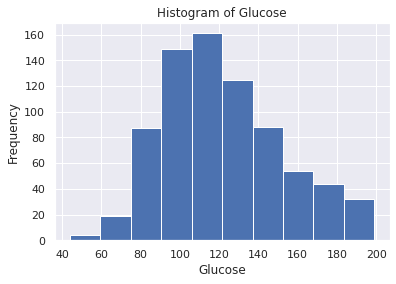

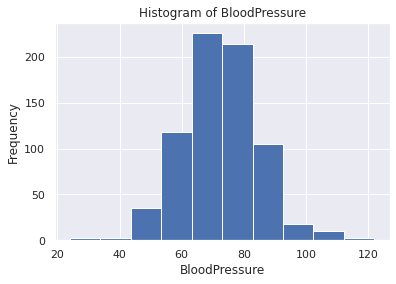

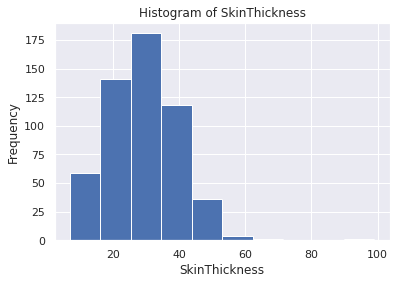

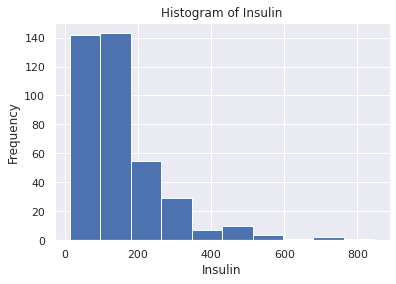

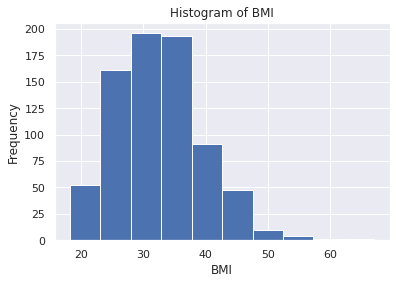

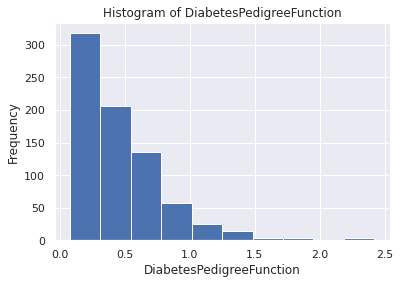

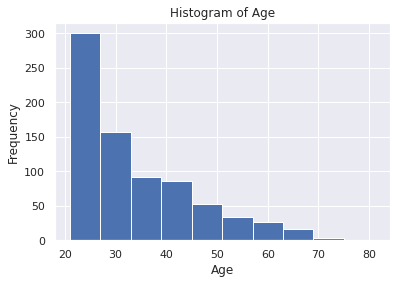

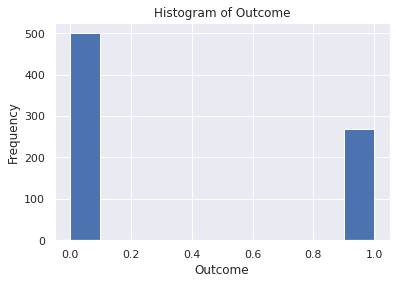

In [9]:
for column in diabetes_data.columns:
    plt.hist(diabetes_data[column], bins=10)  # Adjust the number of bins as needed
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column)
    plt.show()


We are going to use the imputation strategy of replacing the zeros with mean and median values.

In [10]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

Let's check out the histograms of each column after replacing NaN with means/meadians:

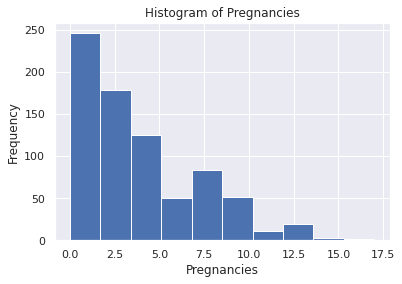

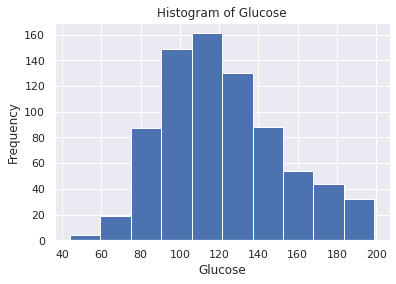

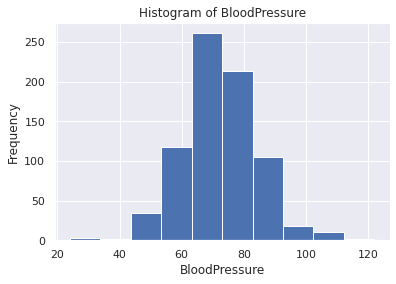

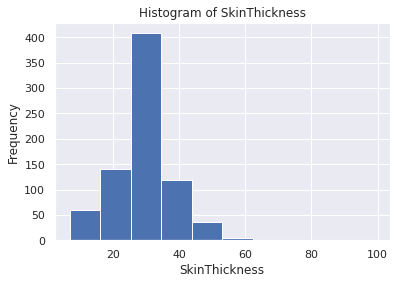

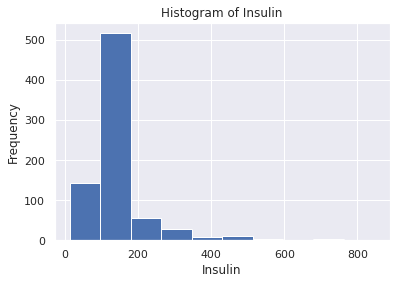

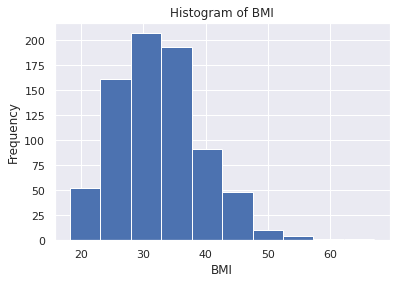

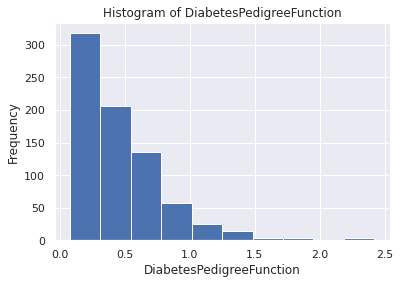

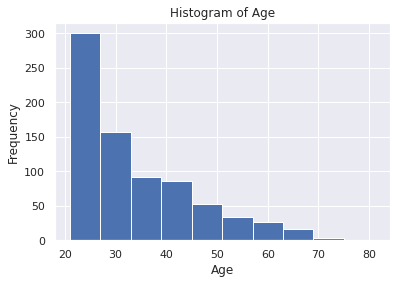

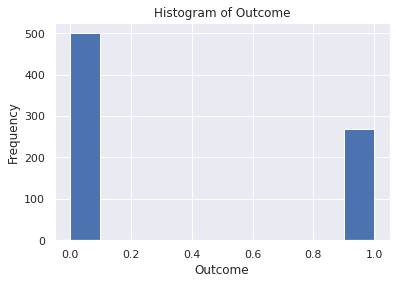

In [11]:
for column in diabetes_data.columns:
    plt.hist(diabetes_data[column], bins=10)  # Adjust the number of bins as needed
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column)
    plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


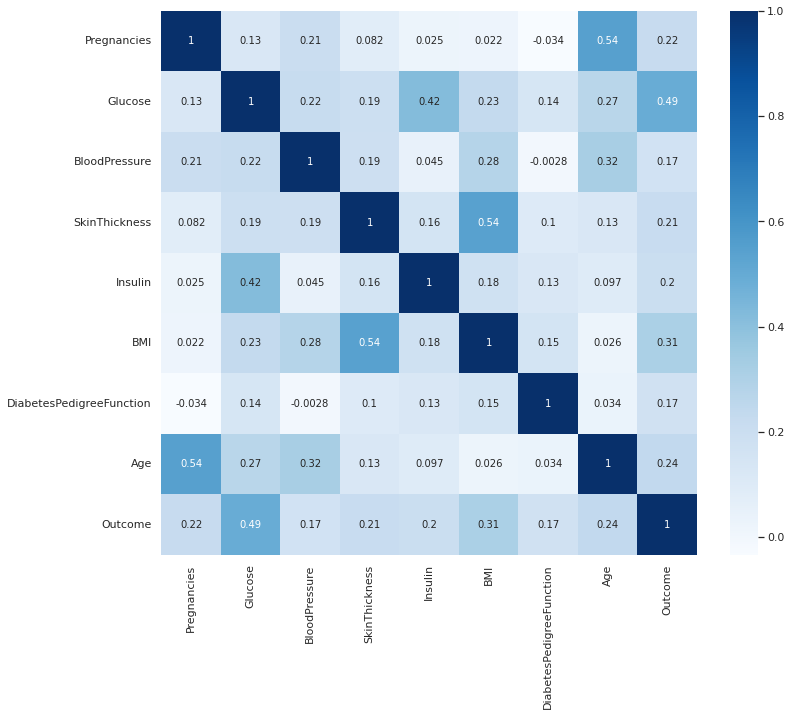

In [12]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

We are intersted in predicting the `Outcome` column, so we shall identify it with the target `y` variable. THe rest of columns will be our features.

In [13]:
y = diabetes_data["Outcome"]
X = diabetes_data.drop("Outcome", axis=1)

#### Train-test split

In [16]:
# Create a 70/30 train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Standarize the magnitude of the features by scaling the values

from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Assuming you have a feature matrix X, you can fit and transform it
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

In [18]:
#### Apply the KNN classifier

Using a range of neighbor values of 1-10, we apply the KNearestNeighbor classifier:

In [14]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

We can now print the train and test scores for each iteration:

In [15]:
print(train_scores)
print(test_scores)

[1.0, 0.851024208566108, 0.8547486033519553, 0.8417132216014898, 0.839851024208566, 0.8230912476722533, 0.8342644320297952, 0.8212290502793296, 0.8268156424581006]
[0.6623376623376623, 0.670995670995671, 0.696969696969697, 0.683982683982684, 0.6926406926406926, 0.683982683982684, 0.7012987012987013, 0.7316017316017316, 0.7142857142857143]


The number of neighbors that resulted in the max score in the training dataset is K=1. On the other hand, the number of neighbors that resulted in the max score in the testing dataset is K=8. 

In order to corroborate the optimal value of K, it is useful to plot the train and test model performance by number of neighbors.

/home/sergio/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/sergio/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


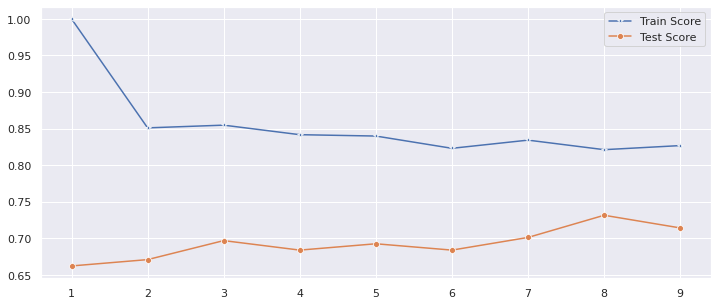

In [18]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

The goal is to choose a value of `K` that generalizes well to unseen data, namely maximizes the test score. This often corresponds to a trade-off point where we are not overfitting (high variance, low k) or underfitting (high bias, high k) the model.  The optimal `K` would then be the one that gives the highest test set score, in this case K=8. 

We may now obtain the confusion matrix for this model fit K=8.

Confusion matrix, without normalization
[[128  23]
 [ 39  41]]


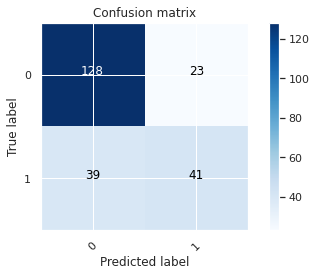

In [19]:
from sklearn.metrics import confusion_matrix
import itertools

knn_8 = KNeighborsClassifier(8)

knn_8.fit(X_train,y_train)

y_pred = knn_8.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

class_names = ['0','1']

plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix')

Finally we print the classification report

In [20]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       151
           1       0.64      0.51      0.57        80

    accuracy                           0.73       231
   macro avg       0.70      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



In [ ]:
#### Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [22]:
# Print the best score and best parameter for n_neighbors
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7951021114572516
Best Parameters: {'n_neighbors': 11}


Here we can see that the ideal number of n_neighbors for this model is 11 based on the grid search performed. 